In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('titanic_train.csv')

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df.shape

(891, 12)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

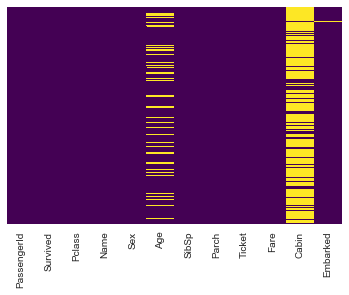

In [120]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

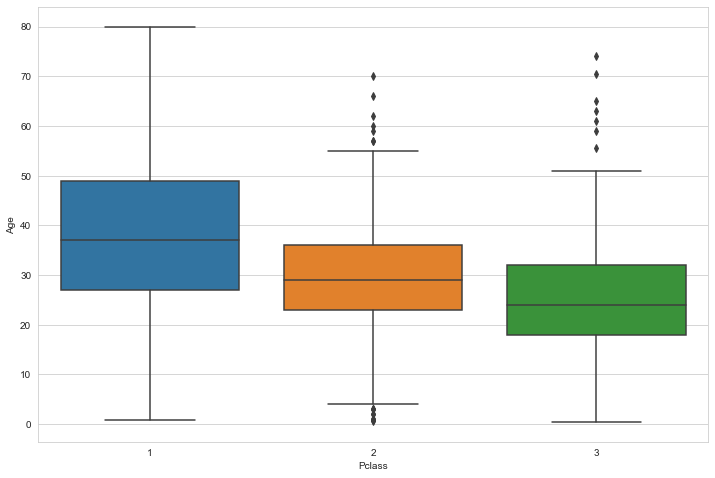

In [121]:
plt.figure(figsize = (12,8))
sns.boxplot(x ='Pclass', y = 'Age', data = df)

In [122]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [123]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)

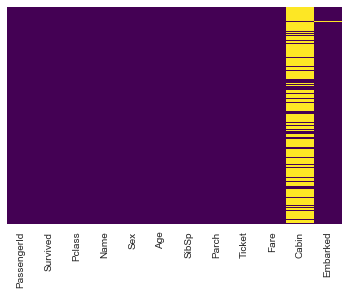

In [124]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [125]:
df.drop('Cabin',axis =1, inplace = True)

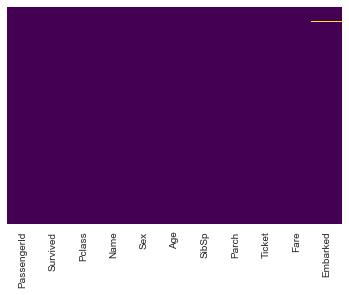

In [126]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'viridis')

In [127]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [128]:
df.dropna(inplace = True)

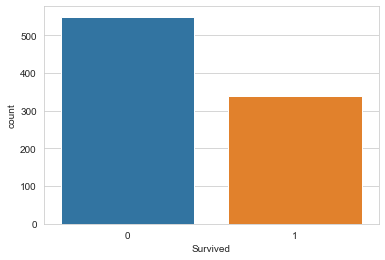

In [129]:
sns.countplot(x = 'Survived', data = df)

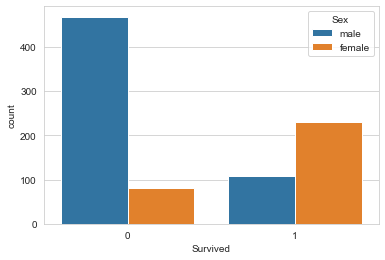

In [130]:
sns.countplot(x= 'Survived', hue = 'Sex', data = df)

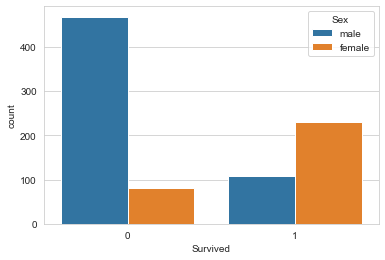

In [131]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue = 'Sex', data = df)

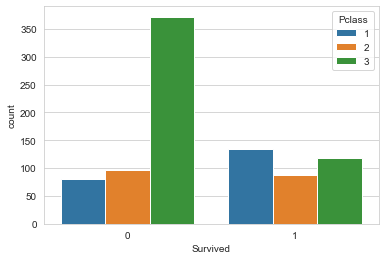

In [132]:
sns.countplot(x= 'Survived', hue = 'Pclass', data = df)

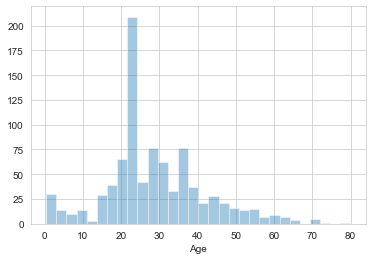

In [133]:
sns.distplot(df['Age'], kde = False,bins = 30)

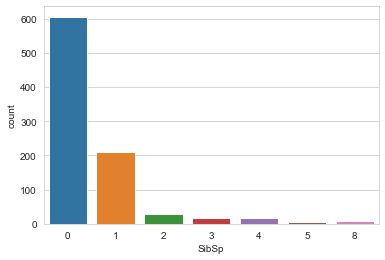

In [134]:
sns.countplot(x = 'SibSp', data = df)

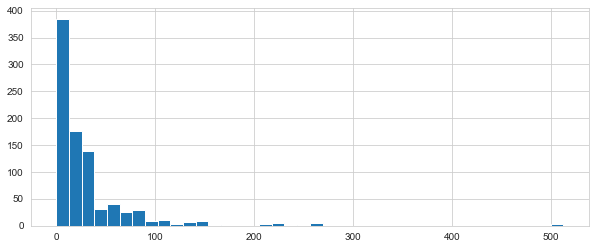

In [135]:
df['Fare'].hist(bins = 40, figsize = (10,4))

In [136]:
import cufflinks as cf

In [137]:
cf.go_offline()

In [139]:
df['Fare'].iplot(kind = 'hist',bins = 30)

In [140]:
sex = pd.get_dummies(df['Sex'],drop_first = True)

In [141]:
embark = pd.get_dummies(df['Embarked'],drop_first = True)

In [142]:
df = pd.concat([df,sex,embark],axis = 1)

In [143]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [144]:
df.drop(['Sex','Embarked','Name', 'Ticket'], axis = 1, inplace = True ) 

In [145]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [146]:
df.drop('PassengerId',axis = 1, inplace = True)

In [147]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [148]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
LRM = LogisticRegression()

In [153]:
LRM.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
predictions = LRM.predict(X_test)

In [155]:
from sklearn.metrics import classification_report

In [156]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

